In [1]:
from HeaderP import *

In [163]:

def monoage(feh,r,age,agebin=np.linspace(0,14,8),xlims=[6,12],ylims=[-1.5,0.5]):
    colors = getcolor(range(len(agebin)+1), cm = plt.cm.get_cmap('plasma'))
    plt.figure(figsize=(20,8))
    for i in range(len(agebin)-1):
        m = (age>agebin[i])&(age<agebin[i+1])
        r_sing, feh_sing = zip(*sorted(zip(r[m], feh[m])))
        r_sing, feh_sing = np.array(r_sing, dtype=float), np.array(feh_sing, dtype=float)
        
        m2 = (r_sing>xlims[0])&(r_sing<xlims[1])
        r_sing = r_sing[m2]
        feh_sing = feh_sing[m2]
        
        r_ave, feh_ave = movingMed_time(r_sing, feh_sing, 1, 0.1)
        #feh_ave = gaussian_filter(feh_ave, 4)
        """if agebin[i]==12.:
            plt.plot(r_sing, feh_sing,'.', color=colors[i], markersize=1)"""
        plt.plot(r_ave, feh_ave, color=colors[i], 
                 label='[%.2f Gyr, %.2f Gyr]'%(agebin[i],agebin[i+1]))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35),
          ncol=3)
    plt.grid(color='grey', linestyle='-', linewidth=1)
    plt.xlabel('R [kpc]')
    plt.ylabel('[Fe/H]')
    plt.xlim(xlims)
    plt.ylim(ylims)
    
    
    
def monoage_line(feh,r,age,agebin=np.linspace(0,14,8),xlims=[6,12],ylims=[-1.5,0.5]):
    colors = getcolor(range(len(agebin)+1), cm = plt.cm.get_cmap('plasma'))
    slopes = np.zeros(len(agebin)-1)
    fehscatter = np.zeros(len(agebin)-1)
    
    plt.figure(figsize=(20,8))
    for i in range(len(agebin)-1):
        m = (age>agebin[i])&(age<agebin[i+1])
        r_sing, feh_sing = zip(*sorted(zip(r[m], feh[m])))
        r_sing, feh_sing = np.array(r_sing, dtype=float), np.array(feh_sing, dtype=float)
        
        m2 = (r_sing>xlims[0])&(r_sing<xlims[1])
        p = fitpoints(r_sing[m2], feh_sing[m2]) 
        slopes[i] = p[1]
        fehscatter[i] = np.std(feh_sing[m2]-p(r_sing[m2]))
        plt.plot(r_sing[m2], p(r_sing[m2]), color=colors[i], 
                 label='[%.2f Gyr, %.2f Gyr]'%(agebin[i],agebin[i+1]))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35),
          ncol=3)
    plt.xlabel('R [kpc]')
    plt.ylabel('[Fe/H]')
    plt.xlim(xlims)
    plt.ylim(ylims)
    return (agebin[:-1]+agebin[1:])/2, slopes, fehscatter
    

# Maosheng subgiant: https://www.nature.com/articles/s41586-022-04496-5

In [158]:
from astropy.io import ascii
data = ascii.read("../GaiaDR3/41586_2022_4496_MOESM3_ESM.txt")  
sub = data.to_pandas()

sub['col14'] = np.array(data['col14'].value, dtype=int)

sub = sub.rename(columns={'col1': 'number id', 'col2': 'ra',
                         'col3': 'dec','col4': 'age','col5': 'age_err',
                          'col6': 'feh','col7': 'feh_err','col8': 'Jr',
                          'col9': 'Jphi','col10': 'Jz','col11': 'X',
                          'col12': 'Y','col13': 'Z','col14': 'source_id',
                         'col15': 'specid','col16': 'snr','col17': 'teff',
                         'col18': 'teff_err','col19': 'logg',
                         'col20': 'logg_err','col21': 'k_mag',
                         'col22': 'k_mag_err','col23': 'k_mag_comb',
                         'col24': 'k_mag_comb_err','col25': 'alpha_fe',
                         'col26': 'alpha_fe_err'})

sub['R'] = np.sqrt(sub['X']**2+sub['Y']**2)
sub['feh'] = np.array(sub['feh'], dtype=float)
sub['age'] = np.array(sub['age'], dtype=float)

Text(0, 0.5, '[α/Fe]')

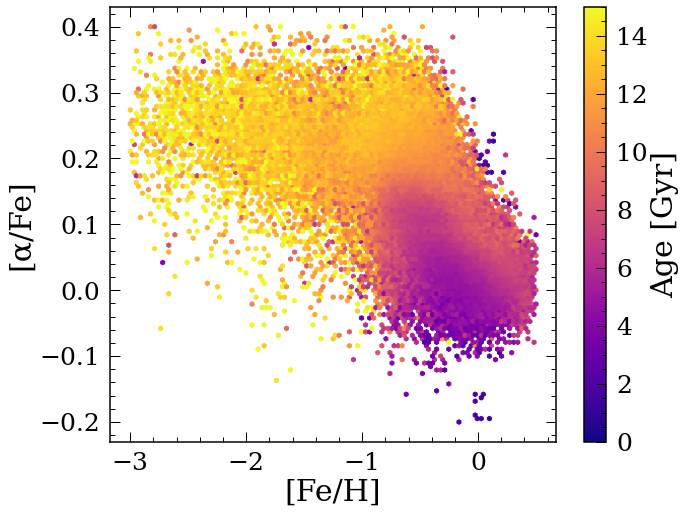

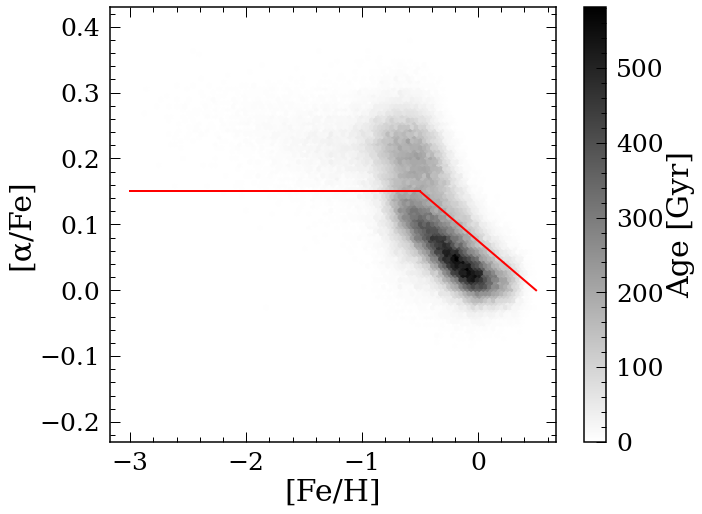

In [159]:
plt.figure(figsize=(10,8))
plt.hexbin(sub['feh'], sub['alpha_fe'], C=sub['age'], extent=(-3,0.5,-0.2,0.4),
          cmap='plasma', vmin=0, vmax=15)
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')


plt.figure(figsize=(10,8))
plt.hexbin(sub['feh'], sub['alpha_fe'], extent=(-3,0.5,-0.2,0.4),
          cmap='binary')

plt.plot([-3,-0.5], [0.15,0.15], 'r-')
plt.plot([-0.5,0.5], [0.15,0], 'r-')
def hilow_disk(feh, alpha):
    hi_low = np.zeros(len(feh))
    
    m = feh<-0.5
    hi_low[m] = alpha[m]>0.15
    
    p = fitpoints([-0.5,0.5], [0.15,0])
    hi_low[~m] = alpha[~m]>p(feh[~m])
    
    return hi_low

sub['hi_low'] = hilow_disk(sub['feh'].values, sub['alpha_fe'].values)
#sub_low = sub.loc[sub['hi_low']==1]
#plt.plot(sub_low['feh'], sub_low['alpha_fe'], 'r.')

cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')

Text(0, 0.5, 'Histogram')

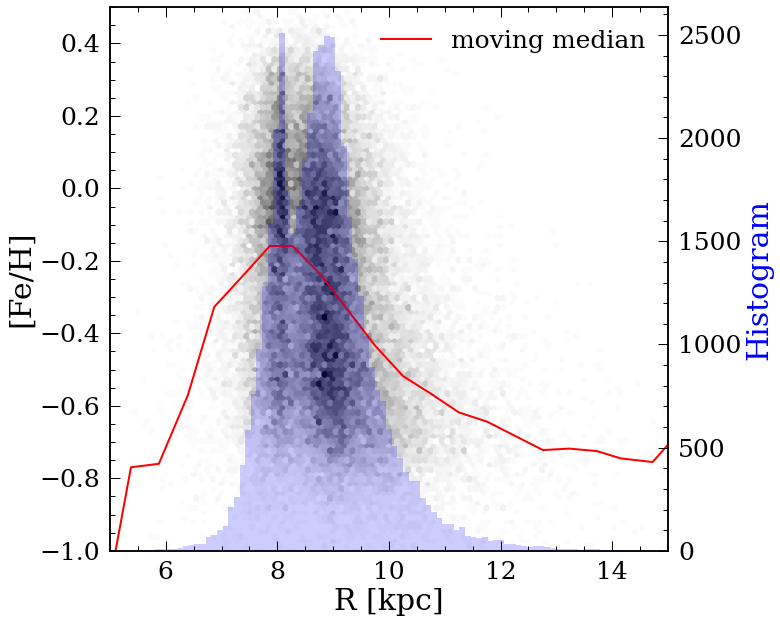

In [196]:
"""plt.hexbin(sub['R'], sub['feh'], C=sub['age'], cmap='plasma',
          extent=(5,15,-3,1), vmin=0, vmax=15)"""

m = (sub['age']>6)&(sub['age']<8)
#plt.plot(sub['R'][m], sub['feh'][m], 'k.', alpha=0.2, markersize=1)
#plt.xlim([0,15])
#plt.ylim([-3,1])

plt.hexbin(sub['R'][m], sub['feh'][m], cmap='binary', extent=(5,15,-1,0.5))
sub = sub.sort_values(by='R')
r_ave, feh_ave = movingMed_time(sub['R'][m], sub['feh'][m], 1, 0.5)
plt.plot(r_ave, feh_ave, 'r-', label='moving median')
plt.legend()
plt.ylabel('[Fe/H]')
plt.xlabel('R [kpc]')
plt.xlim([5,15])
plt.ylim([-1,0.5])

plt.twinx()
plt.hist(sub['R'][m], bins=np.linspace(5,15,100), alpha=0.2, color='b')
plt.ylabel('Histogram', color='b')

Text(0, 0.5, 'Metallicity Scatter')

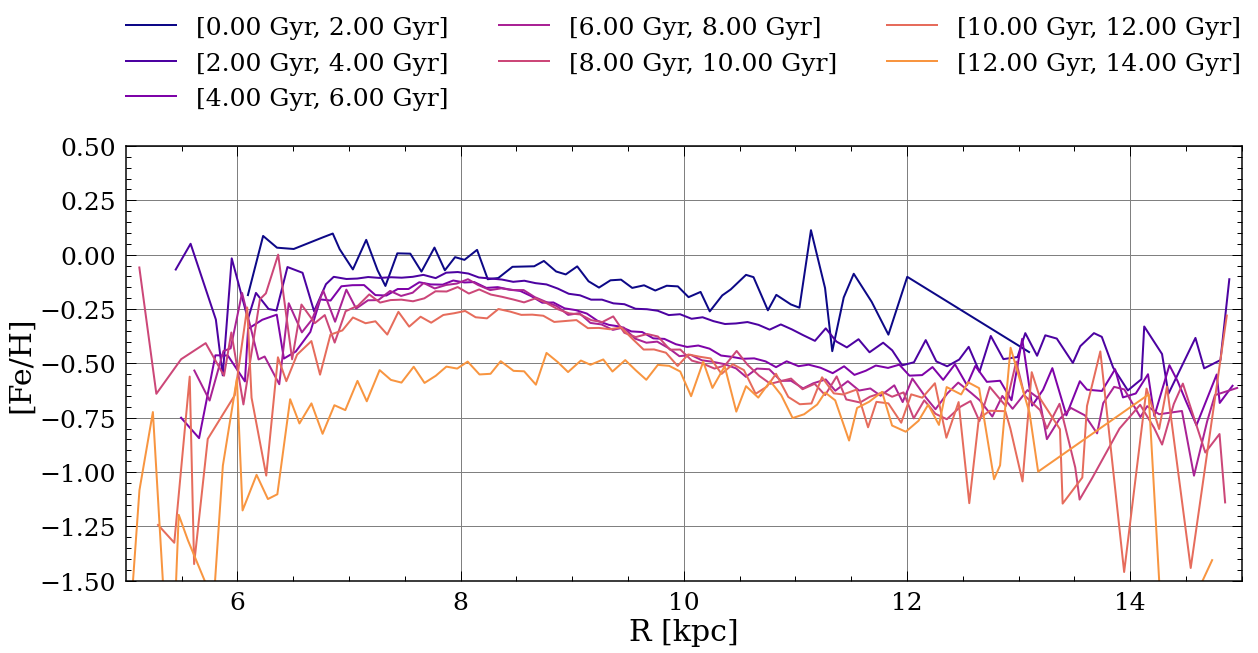

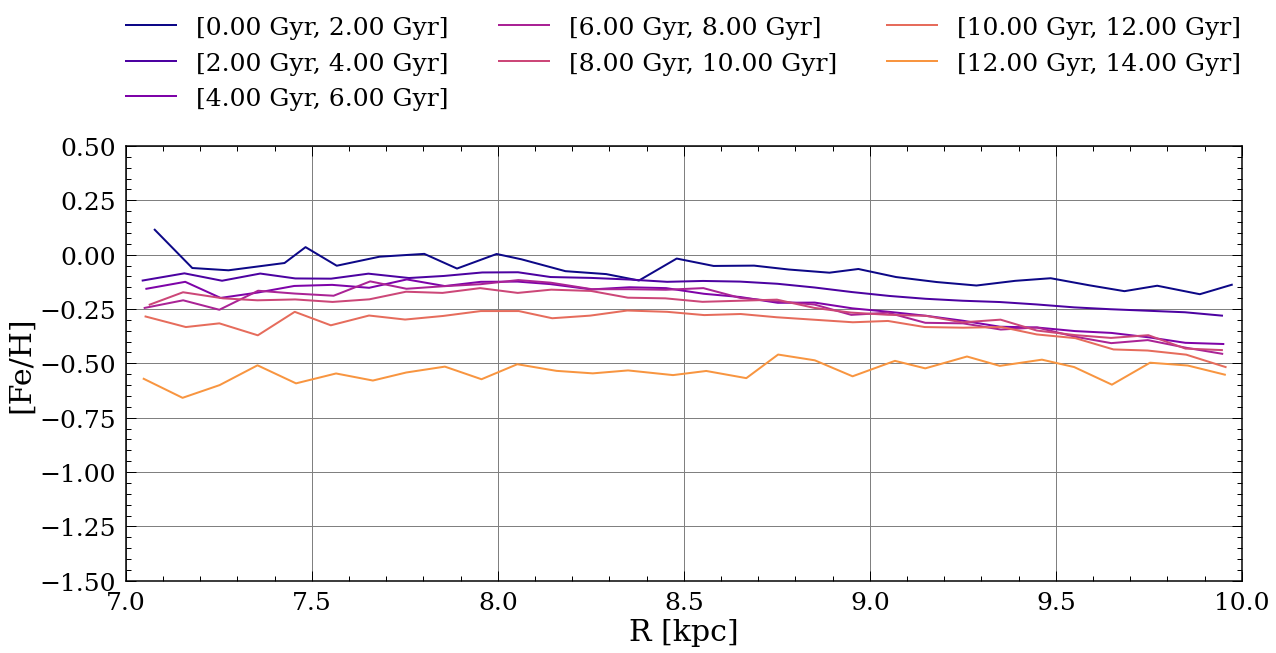

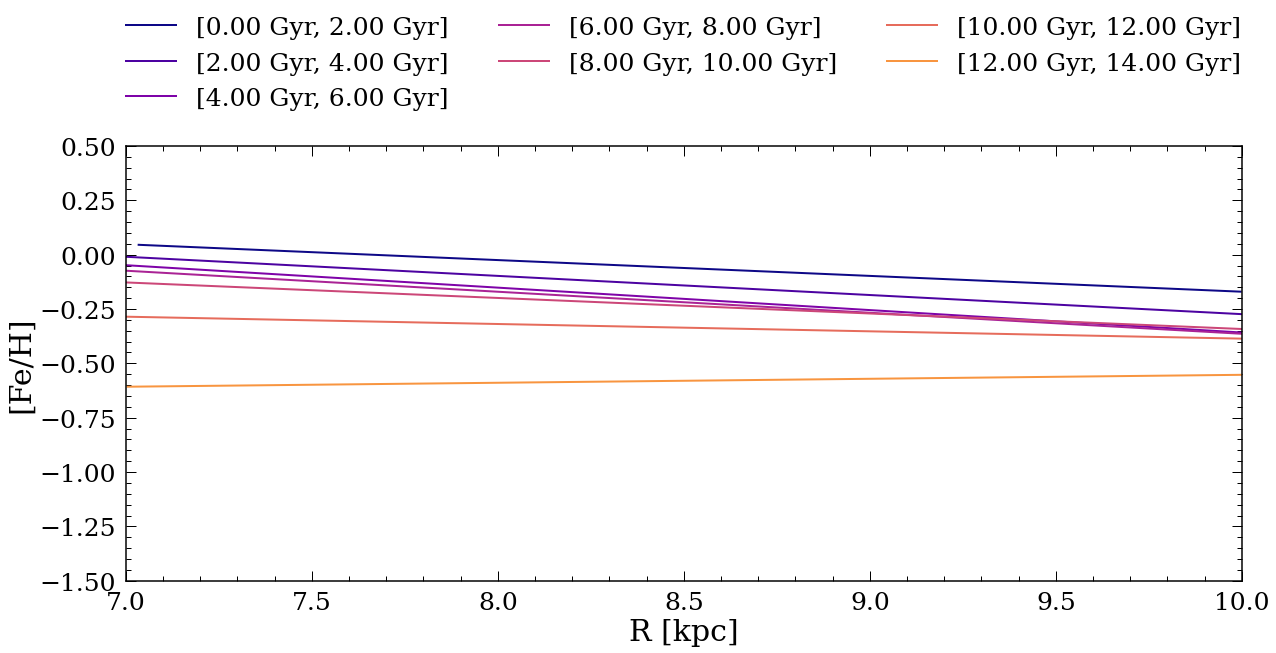

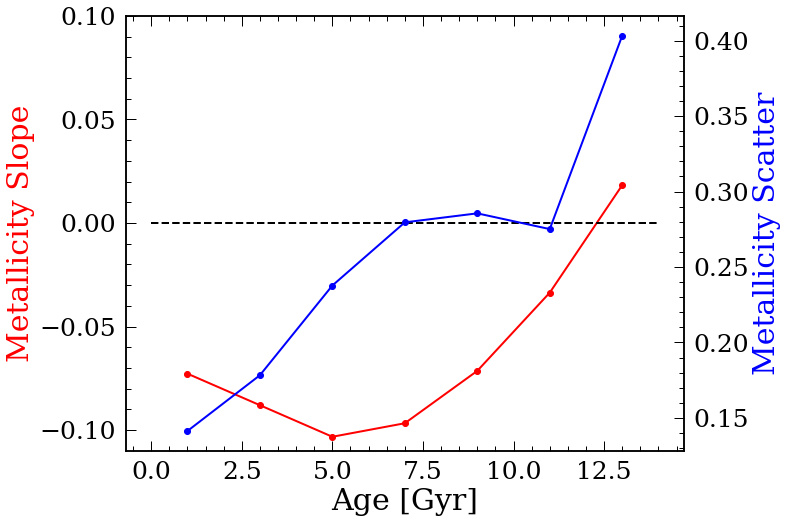

In [167]:
import warnings
warnings.filterwarnings('ignore')

m = (sub['hi_low']==0)
monoage(sub['feh'].values[m], sub['R'].values[m], sub['age'].values[m],
        xlims=[5,15])


monoage(sub['feh'].values[m], sub['R'].values[m], sub['age'].values[m],
        xlims=[7,10])

ages, slopes, fehscatter = monoage_line(sub['feh'].values[m], 
                                        sub['R'].values[m], 
                                        sub['age'].values[m],xlims=[7,10])

plt.figure(figsize=(10,8))
plt.plot(ages, slopes, 'r-o')
plt.xlabel('Age [Gyr]')
plt.ylabel('Metallicity Slope', color='r')
plt.plot([0,14],[0,0], 'k--')
plt.ylim([-0.11, 0.1])

plt.twinx()
plt.plot(ages, fehscatter, 'b-o')
plt.ylabel('Metallicity Scatter', color='b')


Text(0, 0.5, 'Metallicity Scatter')

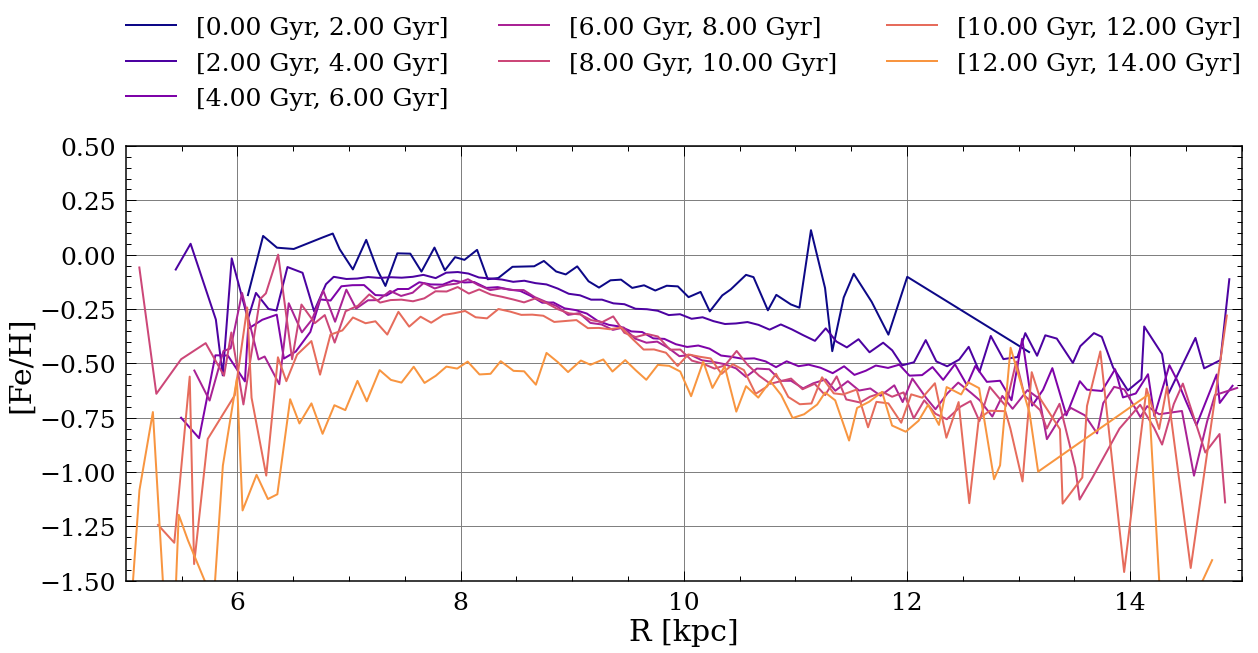

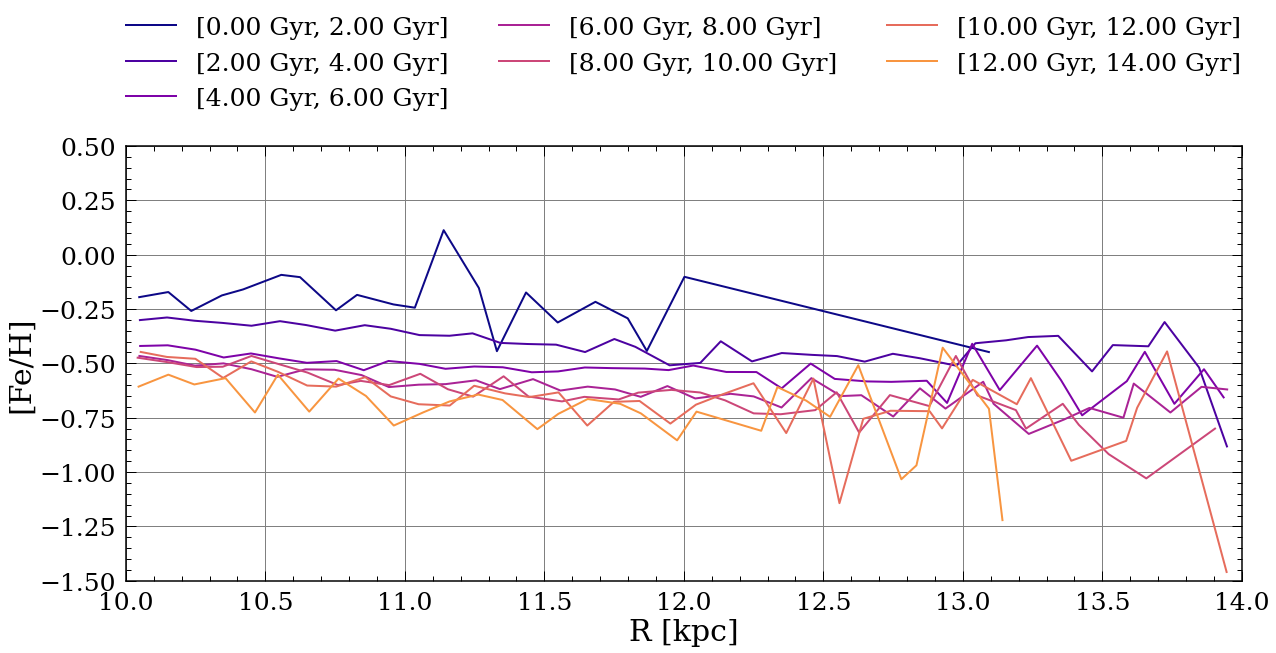

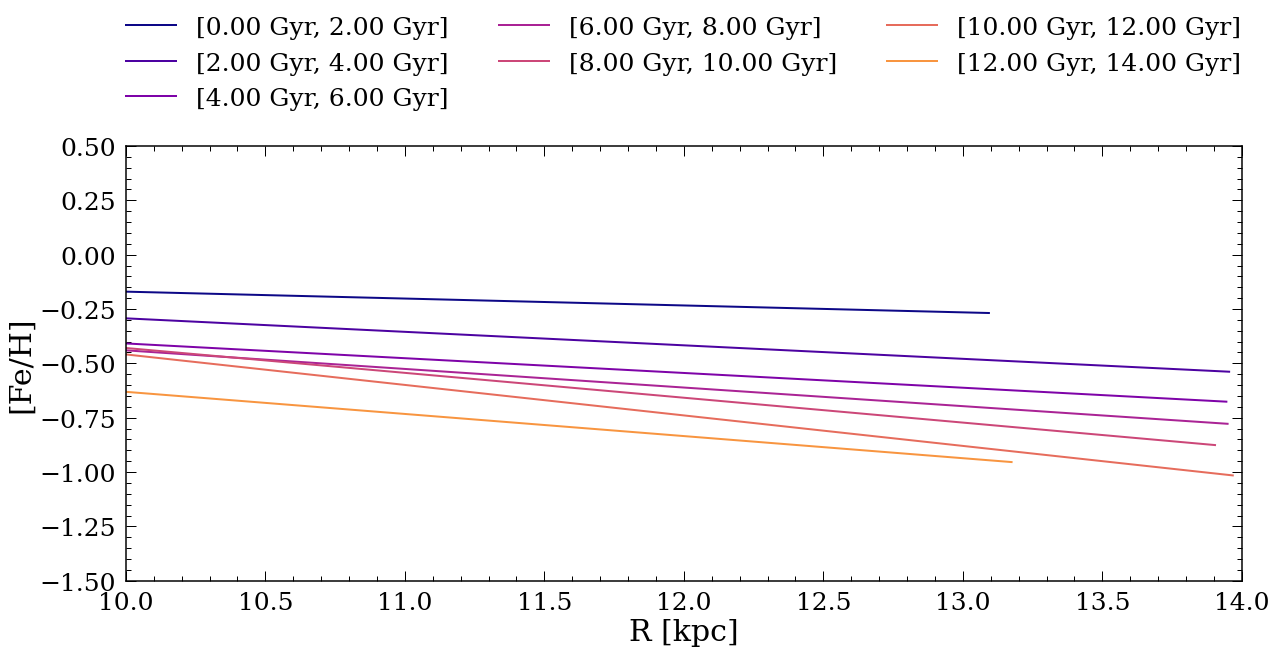

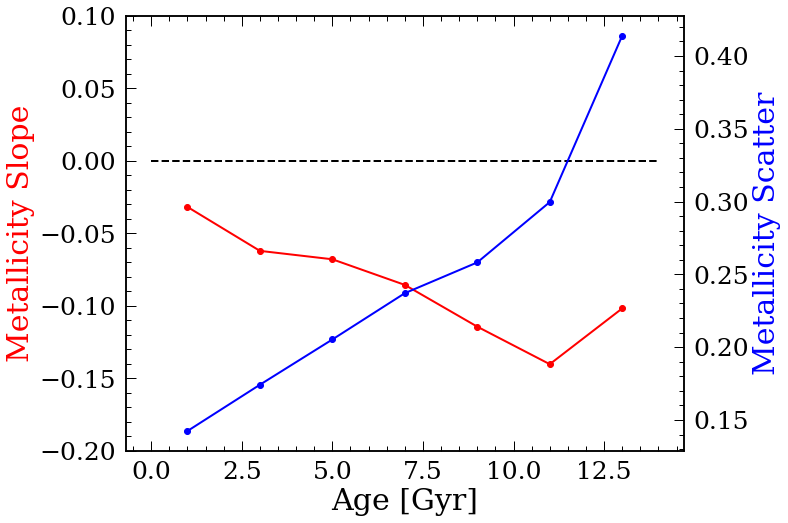

In [170]:
import warnings
warnings.filterwarnings('ignore')

m = (sub['hi_low']==0)
monoage(sub['feh'].values[m], sub['R'].values[m], sub['age'].values[m],
        xlims=[5,15])


monoage(sub['feh'].values[m], sub['R'].values[m], sub['age'].values[m],
        xlims=[10,14])

ages, slopes, fehscatter = monoage_line(sub['feh'].values[m], 
                                        sub['R'].values[m], 
                                        sub['age'].values[m],xlims=[10,14])

plt.figure(figsize=(10,8))
plt.plot(ages, slopes, 'r-o')
plt.xlabel('Age [Gyr]')
plt.ylabel('Metallicity Slope', color='r')
plt.plot([0,14],[0,0], 'k--')
plt.ylim([-0.2, 0.1])

plt.twinx()
plt.plot(ages, fehscatter, 'b-o')
plt.ylabel('Metallicity Scatter', color='b')



# RVS DR3

In [113]:
rvs = pd.read_csv('DR3_age_rvs_mh.csv')

In [114]:
rvs = rvs.loc[(rvs['r']>0)&(rvs['r']<15)].reset_index(drop=True)
rvs = rvs.loc[abs(rvs['z']>0)].reset_index(drop=True)
len(rvs)

428707

Text(0, 0.5, 'Metallicity Scatter')

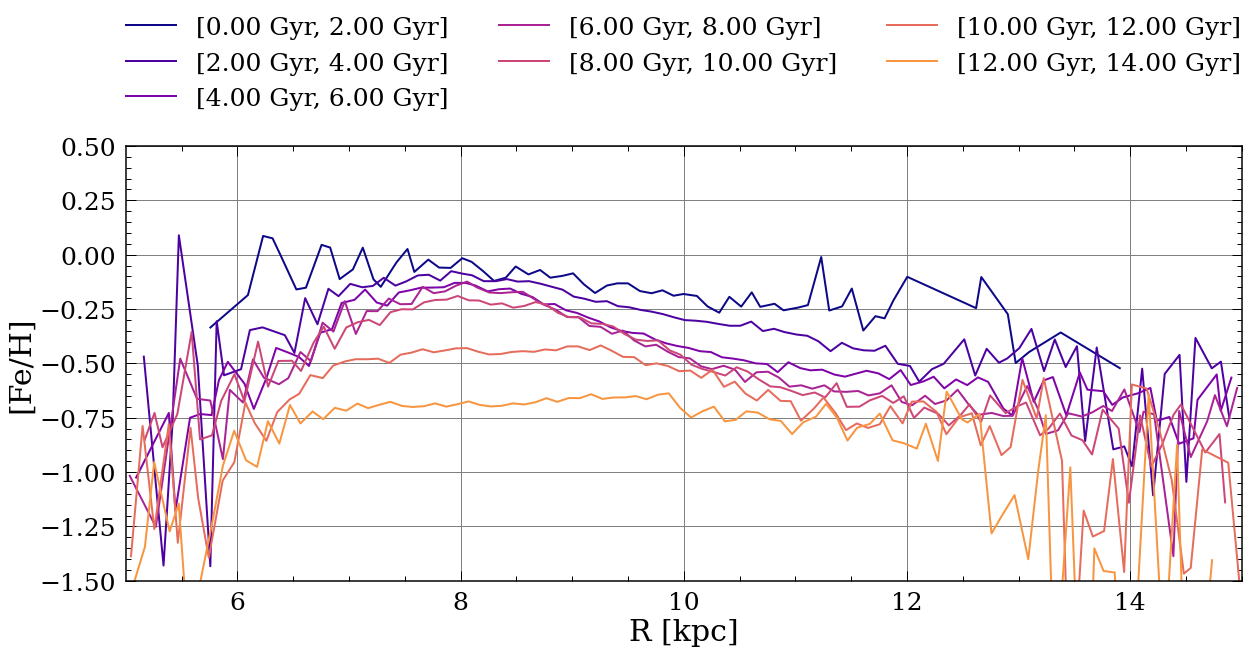

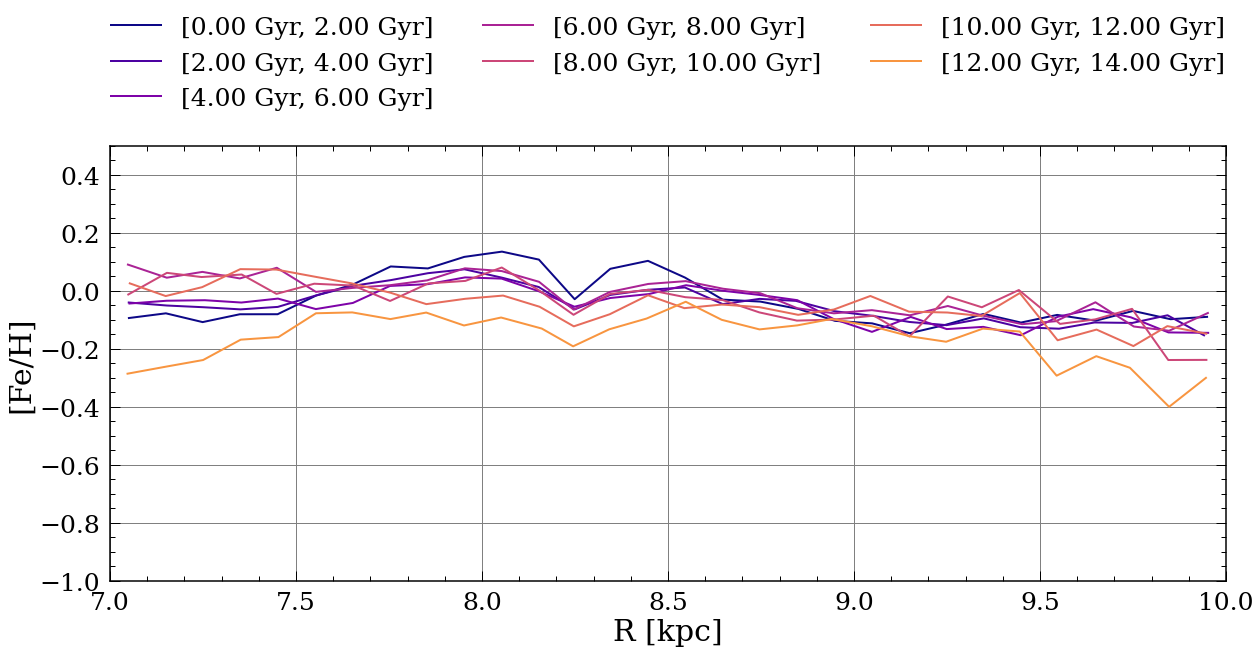

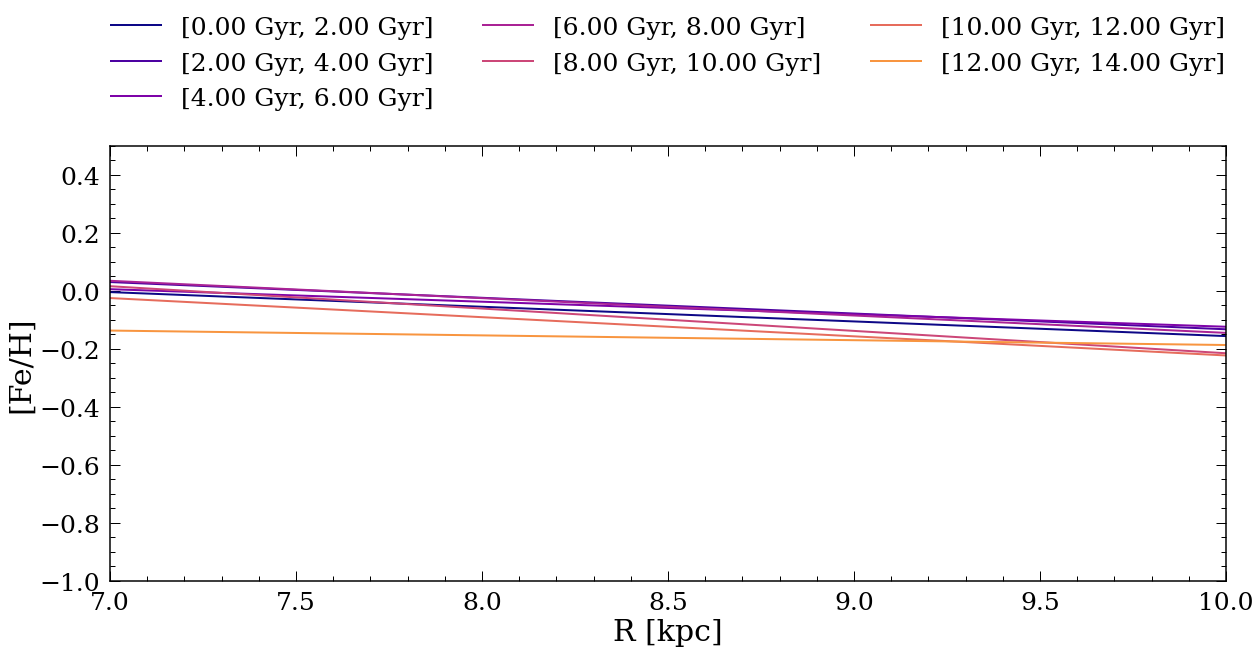

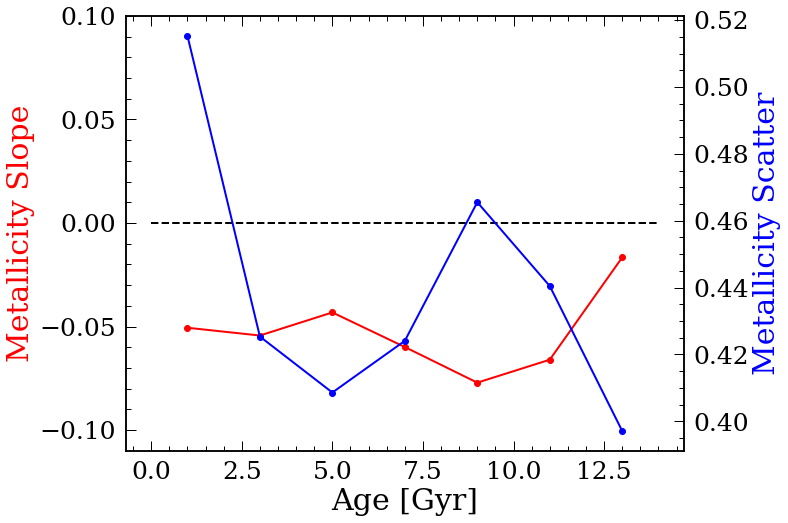

In [165]:

monoage(sub['feh'].values[m], sub['R'].values[m], sub['age'].values[m],
        xlims=[5,15])

monoage(rvs['m_h_rvs'].values, rvs['r'].values, rvs['age'].values,
        xlims=[7,10],ylims=[-1,0.5])

ages, slopes, fehscatter = monoage_line(rvs['m_h_rvs'].values, 
                                        rvs['r'].values, 
                                        rvs['age'].values,xlims=[7,10],
                                        ylims=[-1,0.5])

plt.figure(figsize=(10,8))
plt.plot(ages, slopes, 'r-o')
plt.xlabel('Age [Gyr]')
plt.ylabel('Metallicity Slope', color='r')
plt.plot([0,14],[0,0], 'k--')
plt.ylim([-0.11, 0.1])

plt.twinx()
plt.plot(ages, fehscatter, 'b-o')
plt.ylabel('Metallicity Scatter', color='b')